In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as ticker

data_fav = pd.read_excel(r'C:\Users\Seal\PycharmProjects\Digital office\data_favorite.xlsx')
data = pd.read_excel(r'C:\Users\Seal\PycharmProjects\Digital office\data_clean.xlsx')

#data_fav = pd.read_excel(r'C:\Users\newsl\datasets\Digital Office\data_favorite.xlsx')
#data = pd.read_excel(r'C:\Users\newsl\datasets\Digital Office\data_clean.xlsx')

In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data_fav = data_fav.drop('Unnamed: 0', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      22360 non-null  int64         
 1   event_date    22360 non-null  datetime64[ns]
 2   month         22360 non-null  int64         
 3   year          22360 non-null  int64         
 4   referrer_new  22360 non-null  object        
 5   transition    22360 non-null  object        
 6   title_new     22360 non-null  object        
 7   uid           22360 non-null  object        
 8   url_new       22360 non-null  object        
 9   fav           22360 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 1.6+ MB


In [3]:
data.head()

,event_id,event_date,month,year,referrer_new,transition,title_new,uid,url_new,fav
0,4833851,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Digital office / Офис,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False
1,4833855,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Незакрепленные рабочие места,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False
2,4833859,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,4 этаж,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False
3,4829519,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Где поесть в Невской Ратуше,987b6c531103a69837ab47091f2cdf649026d540559a9d...,https://kb.gazprom-neft.local/pages/viewpage.a...,True
4,4834253,2022-01-10,1,2022,Прямой,Прямой,Концепция распределения рабочих мест для ДЦТ и...,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False


In [4]:
data_2022 = data.query('event_date < "2023-01-01"')

### Количество сессий и пользователей: 
- Всего сессий за 2022 г. - **20868 шт**
- Количество сессий по избранным страничкам за 2022 г. - **7439 шт**
- Количество уникальных пользователей за 2022 г. - **4427 чел**
- Количество уникальных пользователей, посетивших избранные странички в 2022 г. - **2090 чел**

- В среднем сессий на 1 пользователя: **4.7 шт**
- В среднем сессий на 1 пользователя при посещении избранных страничек:  **3.6 шт**

In [5]:
print(data_2022['event_id'].nunique())
print(data_2022.query('fav == True')['event_id'].nunique())
print(data_2022['uid'].nunique())
print(data_2022.query('fav == True')['uid'].nunique())
print("{:.2}".format(data_2022['event_id'].nunique()/data_2022['uid'].nunique()))
print("{:.2}".format(data_2022.query('fav == True')['event_id'].nunique()/data_2022.query('fav == True')['uid'].nunique()))

20868
7439
4427
2090
4.7
3.6


### Пользователи, посетившие раздел один раз
- Количество пользователей, посетивших раздел только один раз: **2148 чел.**
- Доля пользователей, посетивших раздел всего один раз: **48.52%**

In [6]:
temp = data_2022.groupby('uid')['event_id'].nunique().reset_index()
print(len(temp.query('event_id == 1')))
print("{:.2%}".format(len(temp.query('event_id == 1')) / data_2022['uid'].nunique()))

2148
48.52%


In [7]:
temp.query('event_id < 20').pivot_table(columns = 'event_id', values = 'uid', aggfunc = 'nunique')

event_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
uid,2148,667,404,267,181,124,110,76,63,58,45,32,27,20,16,17,18,14,14


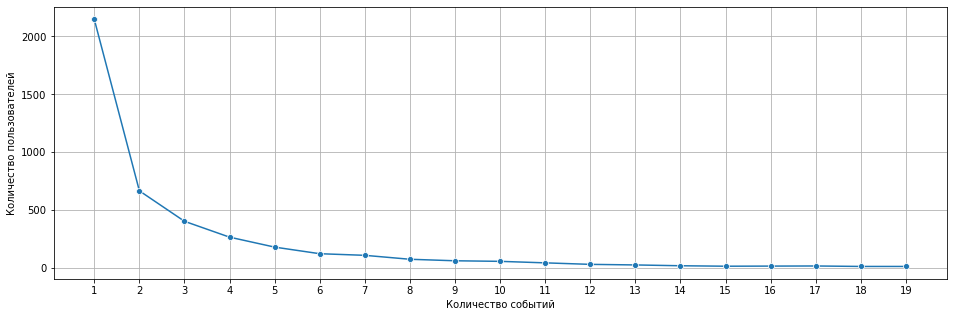

In [8]:
plt.figure(figsize=(16, 5))
ax = sns.lineplot(data=temp.query('event_id < 20').pivot_table(columns = 'event_id', values = 'uid', aggfunc = 'nunique').T, 
             x="event_id", y="uid", marker='o')
ax.xaxis.set_major_locator(ticker.FixedLocator([x for x in range (1,20)]))
ax.set_xticklabels([x for x in range (1,20)])
ax.grid()

plt.ylabel('Количество пользователей')
plt.xlabel('Количество событий')
plt.show()

### Удержание пользователей

In [9]:
data_2022.groupby('uid').agg({'event_date': 'first'}).reset_index()

,uid,event_date
0,000a518b-645b-4ba8-b87b-69bdb1968611,2022-07-12
1,000b74ae-24ce-4ce1-beae-cea5e430dc70,2022-12-22
2,0047ab09-f9ed-480c-a0c4-c61e6b21e396,2022-10-17
3,004890a1-3b4b-4f05-a952-6e1c66845dcc,2022-10-11
4,00641e87-af91-416c-bcda-65d347f7c25f,2022-09-21
...,...,...
4422,ffc13236-bb1d-4769-a47a-37c39da7a77a,2022-05-19
4423,ffc43dbd-3a76-4251-9886-87b20ee30e8a,2022-05-16
4424,ffd668b7-072b-4111-82ac-c4fc4fcb6f47,2022-07-12
4425,ffdbe818-95e1-4c2f-87b4-5faf720006fd,2022-09-15


In [10]:
data_2022 = data_2022.merge(data_2022.groupby('uid').agg({'event_date': 'first'}).reset_index(),  
                            on='uid', how='left').rename(columns={'event_date_x': 'event_date', 'event_date_y': 'first_visit'})

In [11]:
data_2022['lifetime'] = (data_2022['event_date'] - data_2022['first_visit']).dt.days

In [12]:
data_2022.query('lifetime == 1').agg({'uid': 'nunique'})

uid    94
dtype: int64

In [13]:
data_2022.head()

,event_id,event_date,month,year,referrer_new,transition,title_new,uid,url_new,fav,first_visit,lifetime
0,4833851,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Digital office / Офис,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0
1,4833855,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Незакрепленные рабочие места,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0
2,4833859,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,4 этаж,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0
3,4829519,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Где поесть в Невской Ратуше,987b6c531103a69837ab47091f2cdf649026d540559a9d...,https://kb.gazprom-neft.local/pages/viewpage.a...,True,2022-01-10,0
4,4834253,2022-01-10,1,2022,Прямой,Прямой,Концепция распределения рабочих мест для ДЦТ и...,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0


In [14]:
data_2022_two_weeks = data_2022.query('lifetime <15')
data_2022_two_weeks['first_month'] = data_2022_two_weeks['first_visit'].dt.month

<ipython-input-14-c3e41138b401>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022_two_weeks['first_month'] = data_2022_two_weeks['first_visit'].dt.month


In [15]:
data_2022_two_weeks.head()

,event_id,event_date,month,year,referrer_new,transition,title_new,uid,url_new,fav,first_visit,lifetime,first_month
0,4833851,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Digital office / Офис,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0,1
1,4833855,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Незакрепленные рабочие места,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0,1
2,4833859,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,4 этаж,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0,1
3,4829519,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Где поесть в Невской Ратуше,987b6c531103a69837ab47091f2cdf649026d540559a9d...,https://kb.gazprom-neft.local/pages/viewpage.a...,True,2022-01-10,0,1
4,4834253,2022-01-10,1,2022,Прямой,Прямой,Концепция распределения рабочих мест для ДЦТ и...,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-01-10,0,1


In [16]:
result_grouped = data_2022_two_weeks.pivot_table(
    index=['first_month'], columns='lifetime', values='uid', aggfunc='nunique'
)

result_grouped

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_month,,,,,,,,,,,,,,,
1,12.0,5.0,5.0,5.0,4.0,1.0,1.0,5.0,5.0,5.0,5.0,6.0,NaN,NaN,7.0
2,12.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0
3,5.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,2.0,1.0
4,353.0,6.0,3.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,226.0,6.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
6,317.0,6.0,1.0,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
7,605.0,6.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN
8,533.0,5.0,1.0,3.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0
9,724.0,11.0,6.0,5.0,3.0,2.0,2.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN


In [17]:
cohort_sizes = (
    data_2022_two_weeks.groupby('first_month')
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'cohort_size'})
)

result_grouped = cohort_sizes.merge(
    result_grouped, on='first_month', how='left'
).fillna(0)

result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_month,,,,,,,,,,,,,,,,
1,12,12.0,5.0,5.0,5.0,4.0,1.0,1.0,5.0,5.0,5.0,5.0,6.0,0.0,0.0,7.0
2,12,12.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0
3,5,5.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
4,353,353.0,6.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,226,226.0,6.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,317,317.0,6.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,605,605.0,6.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
8,533,533.0,5.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,724,724.0,11.0,6.0,5.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0


In [18]:
result_grouped = result_grouped.query('index > 3')
result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_month,,,,,,,,,,,,,,,,
4,353,353.0,6.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,226,226.0,6.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,317,317.0,6.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,605,605.0,6.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
8,533,533.0,5.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,724,724.0,11.0,6.0,5.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
10,641,641.0,9.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
11,630,630.0,15.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
12,369,369.0,20.0,10.0,5.0,4.0,5.0,8.0,4.0,3.0,5.0,3.0,0.0,0.0,3.0,3.0


In [19]:
result_grouped['cohort_size'].mean()

488.6666666666667

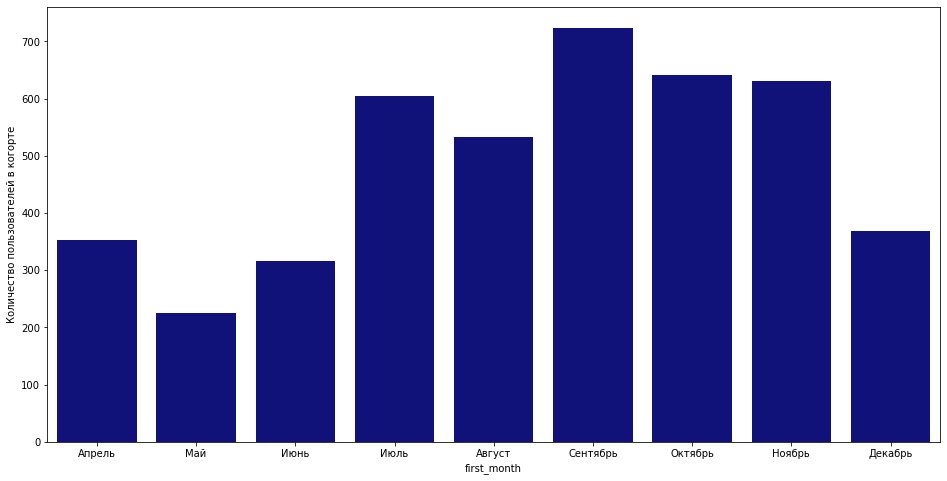

In [20]:
plt.figure(figsize=(16, 8))

ax = sns.barplot(x= result_grouped.index,  y=result_grouped['cohort_size'], color='darkblue', 
                 label = 'Общее количество посетителей за месяц')
plt.ylabel('Количество пользователей в когорте')
ax.set_xticklabels(['Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])

plt.show()

In [21]:
# делим данные таблицы удержания на размеры когорт

result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped['cohort_size'] = cohort_sizes
result_grouped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cohort_size
first_month,,,,,,,,,,,,,,,,
4,1.0,0.016997,0.008499,0.002833,0.002833,0.002833,0.000000,0.002833,0.00000,0.002833,0.000000,0.000000,0.000000,0.000000,0.000000,353
5,1.0,0.026549,0.004425,0.004425,0.008850,0.004425,0.008850,0.008850,0.00000,0.004425,0.000000,0.000000,0.004425,0.000000,0.004425,226
6,1.0,0.018927,0.003155,0.000000,0.000000,0.006309,0.000000,0.003155,0.00000,0.003155,0.000000,0.000000,0.003155,0.000000,0.003155,317
7,1.0,0.009917,0.003306,0.001653,0.001653,0.003306,0.004959,0.001653,0.00000,0.000000,0.000000,0.001653,0.001653,0.003306,0.000000,605
8,1.0,0.009381,0.001876,0.005629,0.001876,0.000000,0.003752,0.001876,0.00000,0.000000,0.001876,0.000000,0.000000,0.000000,0.001876,533
9,1.0,0.015193,0.008287,0.006906,0.004144,0.002762,0.002762,0.002762,0.00000,0.000000,0.002762,0.001381,0.000000,0.000000,0.000000,724
10,1.0,0.014041,0.003120,0.001560,0.004680,0.001560,0.003120,0.001560,0.00156,0.001560,0.000000,0.001560,0.001560,0.000000,0.000000,641
11,1.0,0.023810,0.006349,0.006349,0.006349,0.003175,0.000000,0.000000,0.00000,0.000000,0.000000,0.001587,0.003175,0.000000,0.000000,630
12,1.0,0.054201,0.027100,0.013550,0.010840,0.013550,0.021680,0.010840,0.00813,0.013550,0.008130,0.000000,0.000000,0.008130,0.008130,369


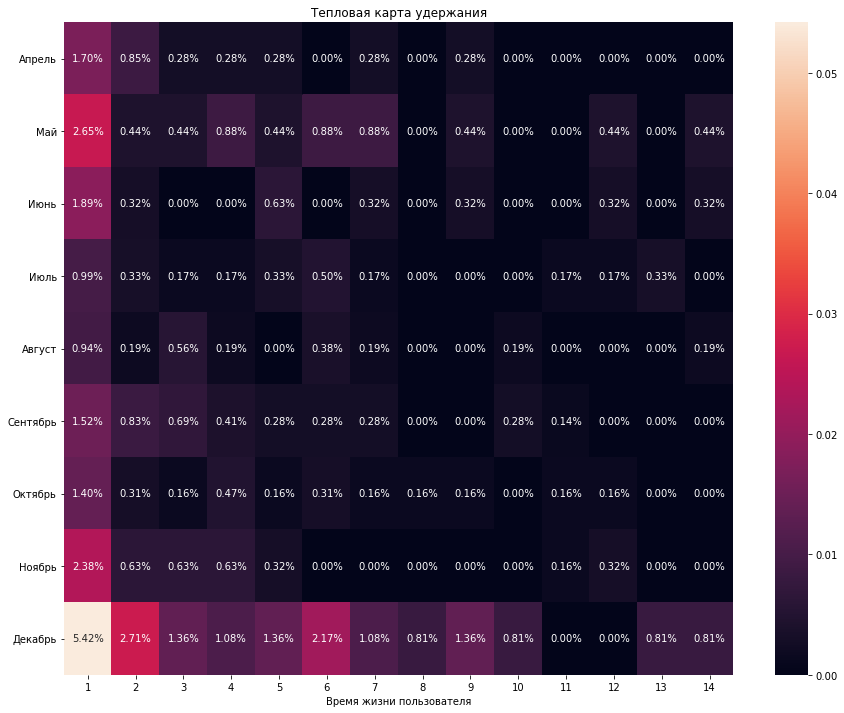

In [22]:
plt.figure(figsize=(15, 12))  
ax = sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт
    annot=True,  
    fmt='.2%',  # переводим значения в проценты
)
ax.set_yticklabels(['Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],rotation = 0)
plt.ylabel('')
plt.xlabel('Время жизни пользователя')
plt.title('Тепловая карта удержания') 
plt.show()

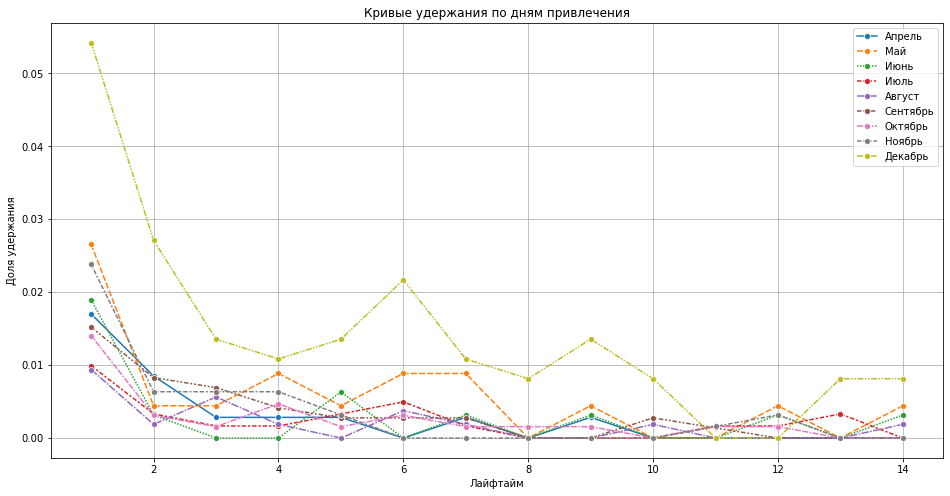

In [23]:
report = result_grouped.drop(columns = ['cohort_size', 0])

plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=report.T,marker='o')
ax.grid()

plt.xlabel('Лайфтайм')  
plt.ylabel('Доля удержания')
plt.legend(['Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.title('Кривые удержания по дням привлечения') 

plt.show()

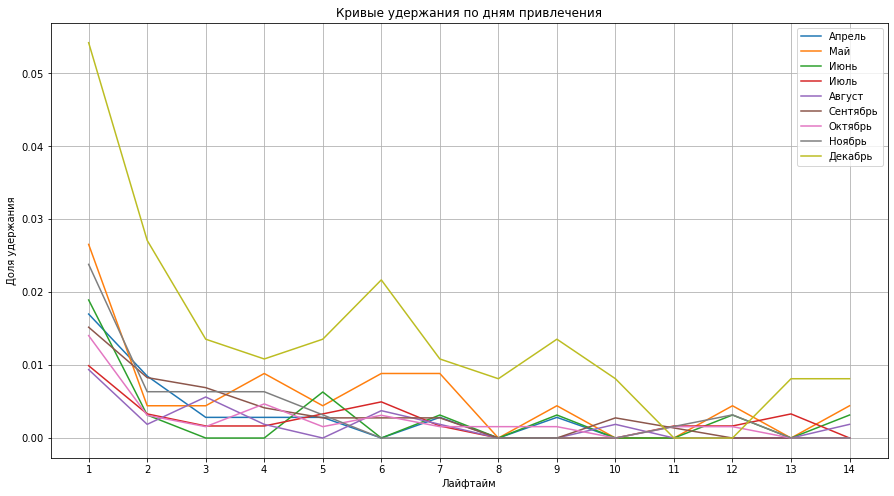

In [24]:
report = result_grouped.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  
    xticks=list(report.columns.values),
    figsize=(15, 8), 
)
plt.xlabel('Лайфтайм')  
plt.ylabel('Доля удержания')
plt.legend(['Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.title('Кривые удержания по дням привлечения') 
plt.show()

### DAU и MAU
- средний DAU за 2022 г. - **18 чел.**
- средний MAU за 2022 г. - **377 чел.**

In [25]:
print(round(data_2022.groupby('event_date').agg({'uid': 'nunique'}).mean()))
print(round(data_2022.groupby('month').agg({'uid': 'nunique'}).mean()))

uid    18.0
dtype: float64
uid    377.0
dtype: float64


In [28]:
data_mean_dau = data_2022.groupby(['event_date', 'month']).agg({'uid': 'nunique'})
data_mean_dau = data_mean_dau.groupby('month').agg({'uid': 'mean'})

In [29]:
data_mean_dau

,uid
month,
1,3.937500
2,3.826087
3,3.000000
4,16.652174
5,12.285714
6,30.727273
7,25.320000
8,22.880000
9,29.961538


In [30]:
def plotter(data, column, labels):
    month_list = ['Январь','Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    plt.figure(figsize=(16, 8))
    ax = sns.barplot(x = month_list,  y=column, data=data, label = labels)
    
    plt.xlabel('Месяцы')
    plt.ylabel('Количество пользователей')
    
    plt.legend()
    plt.show()

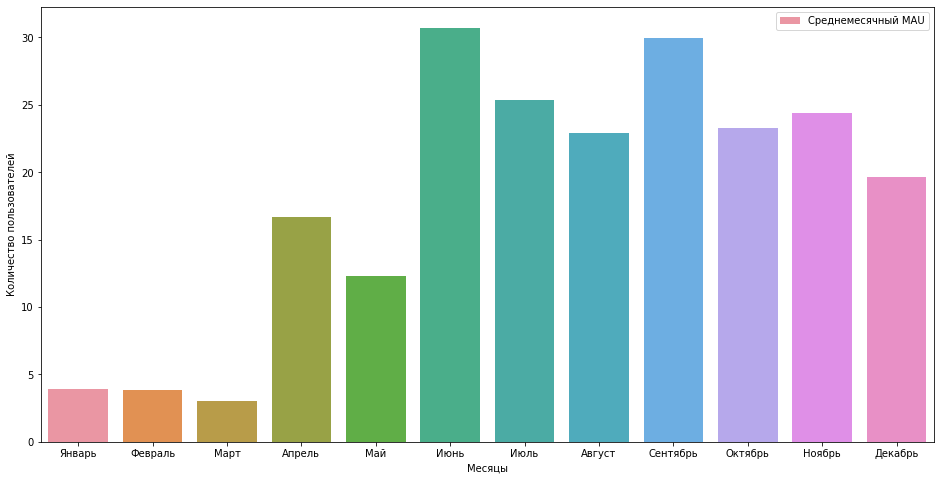

In [31]:
plotter(data_mean_dau, 'uid', 'Среднемесячный MAU')

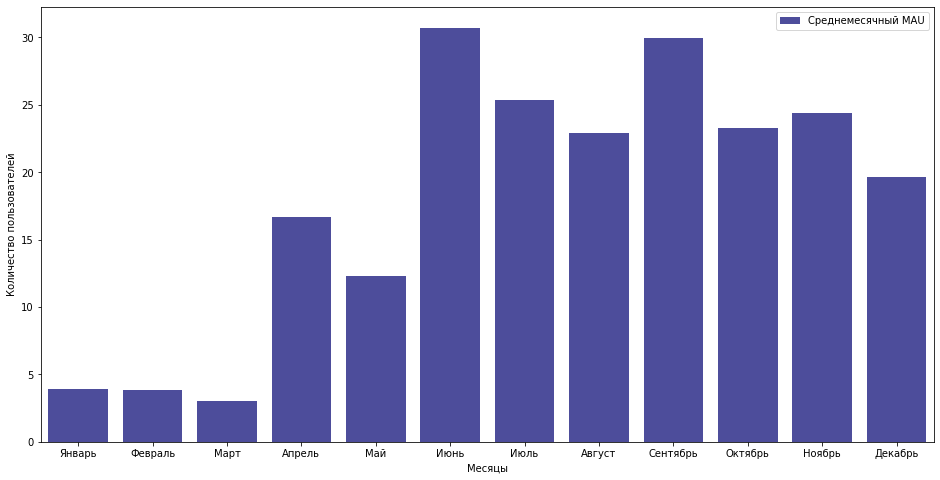

In [32]:
plt.figure(figsize=(16, 8))

month_list = ['Январь','Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
ax = sns.barplot(x= month_list,  y="uid", data=data_mean_dau, color='darkblue', label = 'Среднемесячный MAU', alpha = 0.75)

plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')

plt.legend()
plt.show()

### MAU по месяцам 

In [33]:
data_mau = data_2022.groupby('month').agg({'uid': 'nunique'}).reset_index()
data_fav_mau = data_2022.query('fav == True').groupby('month').agg({'uid': 'nunique'}).reset_index()

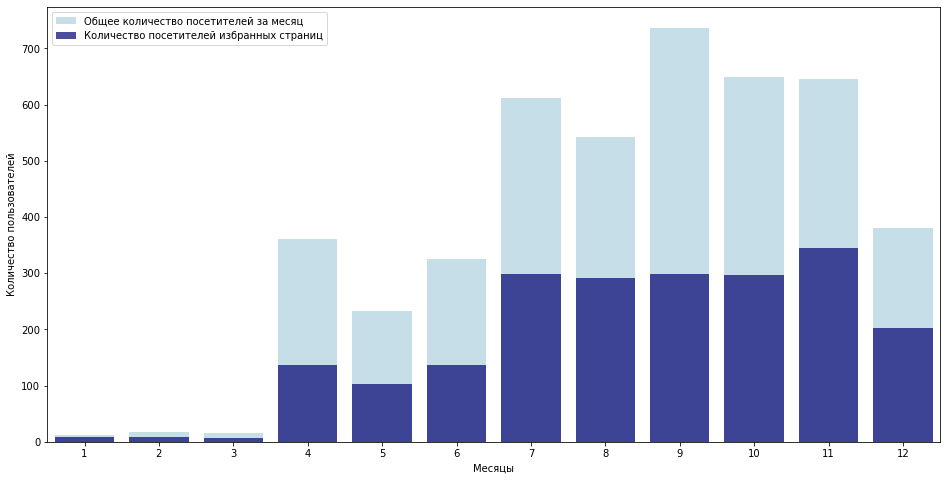

In [34]:
plt.figure(figsize=(16, 8))

ax1 = sns.barplot(x= 'month',  y="uid", data=data_mau, color='lightblue', 
                  label = 'Общее количество посетителей за месяц', alpha = 0.75)
ax2 = sns.barplot(x= 'month',  y="uid", data=data_fav_mau, color='darkblue', 
                  label = 'Количество посетителей избранных страниц', alpha = 0.75)
plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')

ax.xaxis.set_major_locator(ticker.FixedLocator(['Январь','Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']))
ax.set_xticklabels(['Январь','Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])

plt.legend()
plt.show()

### Количество сессий по месяцам

In [35]:
data_sess = data_2022.groupby('month').agg({'event_id': 'nunique'}).reset_index()
data_fav_sess = data_2022.query('fav == True').groupby('month').agg({'event_id': 'nunique'}).reset_index()

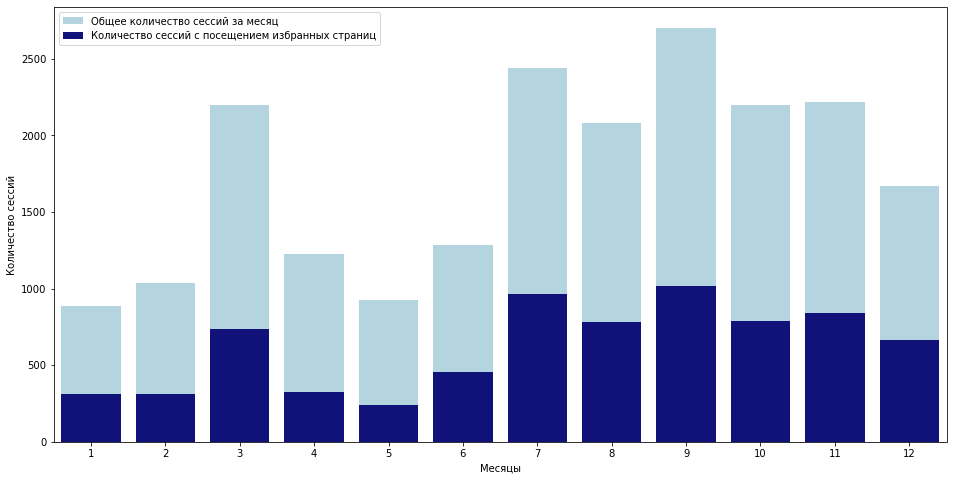

In [36]:
plt.figure(figsize=(16, 8))

bar1 = sns.barplot(x= 'month',  y="event_id", data=data_sess, color='lightblue', label = 'Общее количество сессий за месяц')
bar2 = sns.barplot(x= 'month',  y="event_id", data=data_fav_sess, color='darkblue', label = 'Количество сессий с посещением избранных страниц')
plt.xlabel('Месяцы')
plt.ylabel('Количество сессий')
plt.legend()

#bar1.bar_label(bar1.containers[0], label_type='edge', padding=5)

#for i in bar1.containers:
   # bar1.bar_label(i, padding=5)

plt.show()

### Самые популярные страницы и источники перехода

In [37]:
top_articles = list(data_2022['title_new'].value_counts().head(21).index)
top_articles

['Digital office / Офис',
 'Рассадка "Невская Ратуша"',
 'Запись на спортивные занятия Цифергауз',
 'Памятка руководителю / наставнику',
 'Офис "Цифергауз" на о. Новая Голландия',
 'Рассадка "Цифергауз"',
 'Сценарии пропускного режима',
 'Концепция распределения рабочих мест для ДЦТ и ДИР',
 'Среда здоровья',
 'Командная работа и встречи в Цифергауз (переговорные комнаты)',
 'Офис "Дом Инноваций" в Невской Ратуше',
 'Памятка новому сотруднику',
 'Общая информация Невская Ратуша',
 'Офис ИТ-кластера в Сириусе',
 'Спортивные занятия Цифергауз',
 'Незакрепленные рабочие места',
 'Распределение рабочих мест для ДЦТ, ДИР, ДЦИ',
 'Офисные сервисы Цифергауз',
 'Общая информация Цифергауз',
 'Календарь мероприятий',
 'Общественные пространства и отдых в Цифергаузе']

In [38]:
data_transition = data_2022.groupby('transition').agg({'event_id':'nunique'}).sort_values(by = 'event_id', 
                                                                                          ascending = False).reset_index()
data_transition['percent'] = round(data_transition['event_id'] *100/ data_2022['event_id'].nunique(),2)
data_transition

,transition,event_id,percent
0,Confluence,15642,74.96
1,Прямой,4936,23.65
2,Корпоративный поиск,180,0.86
3,Jira,77,0.37
4,Лента,12,0.06
5,Портал IaaS,11,0.05
6,Прочее,10,0.05


In [39]:
data_top_articles = data_2022.query('title_new in @top_articles').pivot_table(index = 'title_new', 
                        columns = 'transition', values = 'event_id', aggfunc = 'nunique').fillna(0)
data_top_articles

transition,Confluence,Jira,Корпоративный поиск,Лента,Портал IaaS,Прочее,Прямой
title_new,,,,,,,
Digital office / Офис,1651.0,1.0,22.0,0.0,4.0,0.0,1057.0
Запись на спортивные занятия Цифергауз,327.0,0.0,2.0,0.0,0.0,0.0,437.0
Календарь мероприятий,119.0,1.0,1.0,0.0,0.0,0.0,160.0
Командная работа и встречи в Цифергауз (переговорные комнаты),315.0,0.0,1.0,0.0,0.0,0.0,153.0
Концепция распределения рабочих мест для ДЦТ и ДИР,379.0,2.0,0.0,4.0,0.0,0.0,103.0
Незакрепленные рабочие места,272.0,2.0,0.0,0.0,0.0,0.0,26.0
Общая информация Невская Ратуша,321.0,9.0,15.0,0.0,0.0,0.0,52.0
Общая информация Цифергауз,266.0,0.0,4.0,0.0,0.0,0.0,12.0
Общественные пространства и отдых в Цифергаузе,240.0,0.0,3.0,2.0,0.0,0.0,20.0


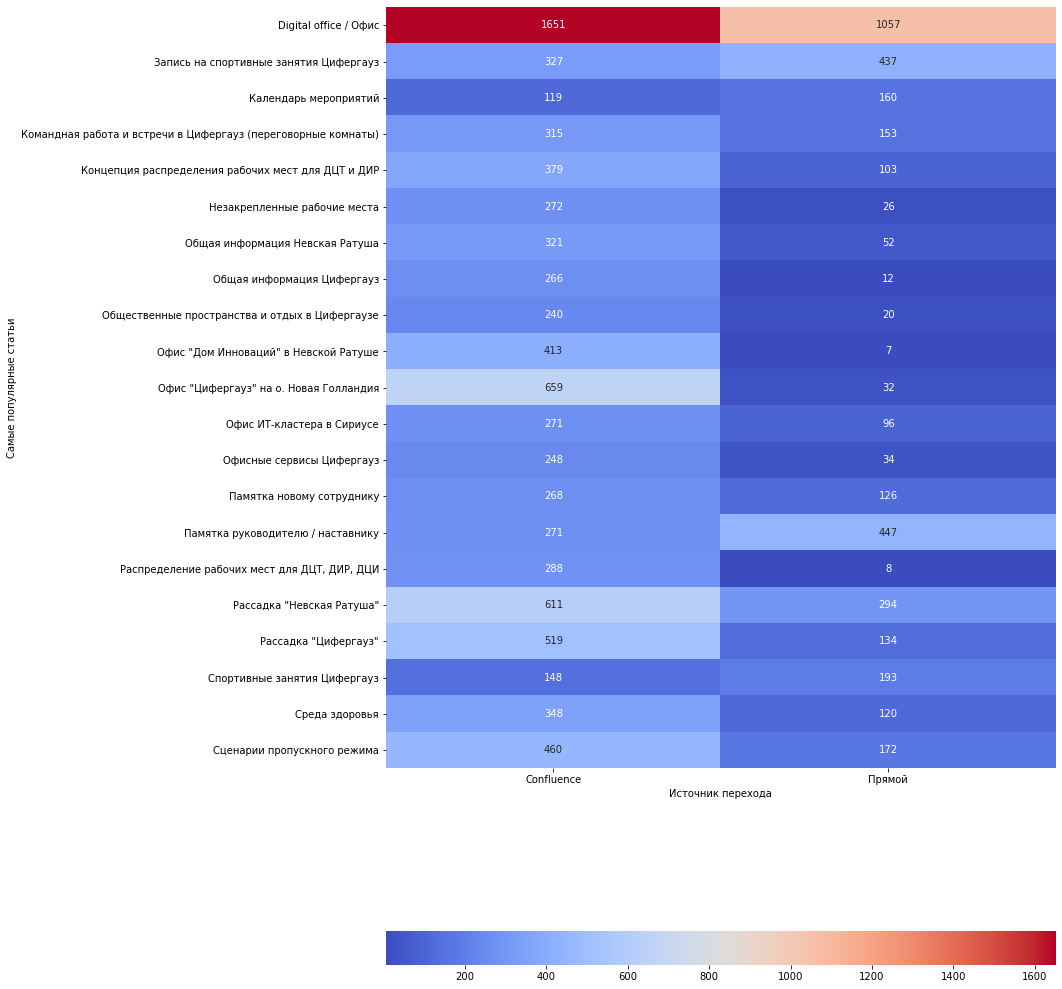

In [40]:
plt.figure(figsize = (12,20))
sns.heatmap(data_top_articles[['Confluence', 'Прямой']], cbar_kws= {'orientation': 'horizontal'}, cmap= 'coolwarm', 
            annot = True, fmt='.4g')
plt.xlabel('Источник перехода')
plt.ylabel('Самые популярные статьи')
plt.show()

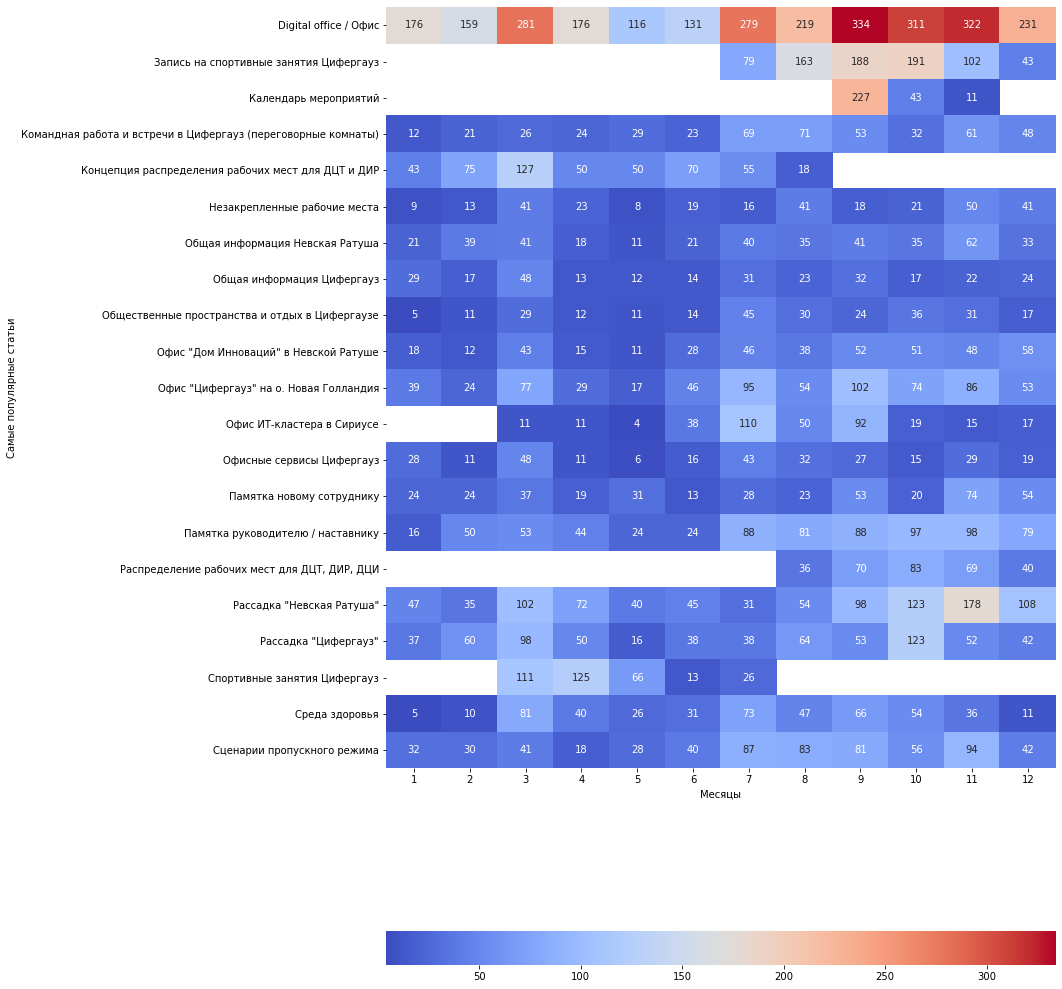

In [41]:
plt.figure(figsize = (12,20))
sns.heatmap(data_2022.query('title_new in @top_articles').pivot_table(index = 'title_new', columns = 'month', 
                             values = 'event_id', aggfunc = 'count'), cbar_kws= {'orientation': 'horizontal'}, 
                             cmap= 'coolwarm', annot = True, fmt='.4g')
plt.xlabel('Месяцы')
plt.ylabel('Самые популярные статьи')
plt.show()

### Распределение посещения избранных страниц по месяцам

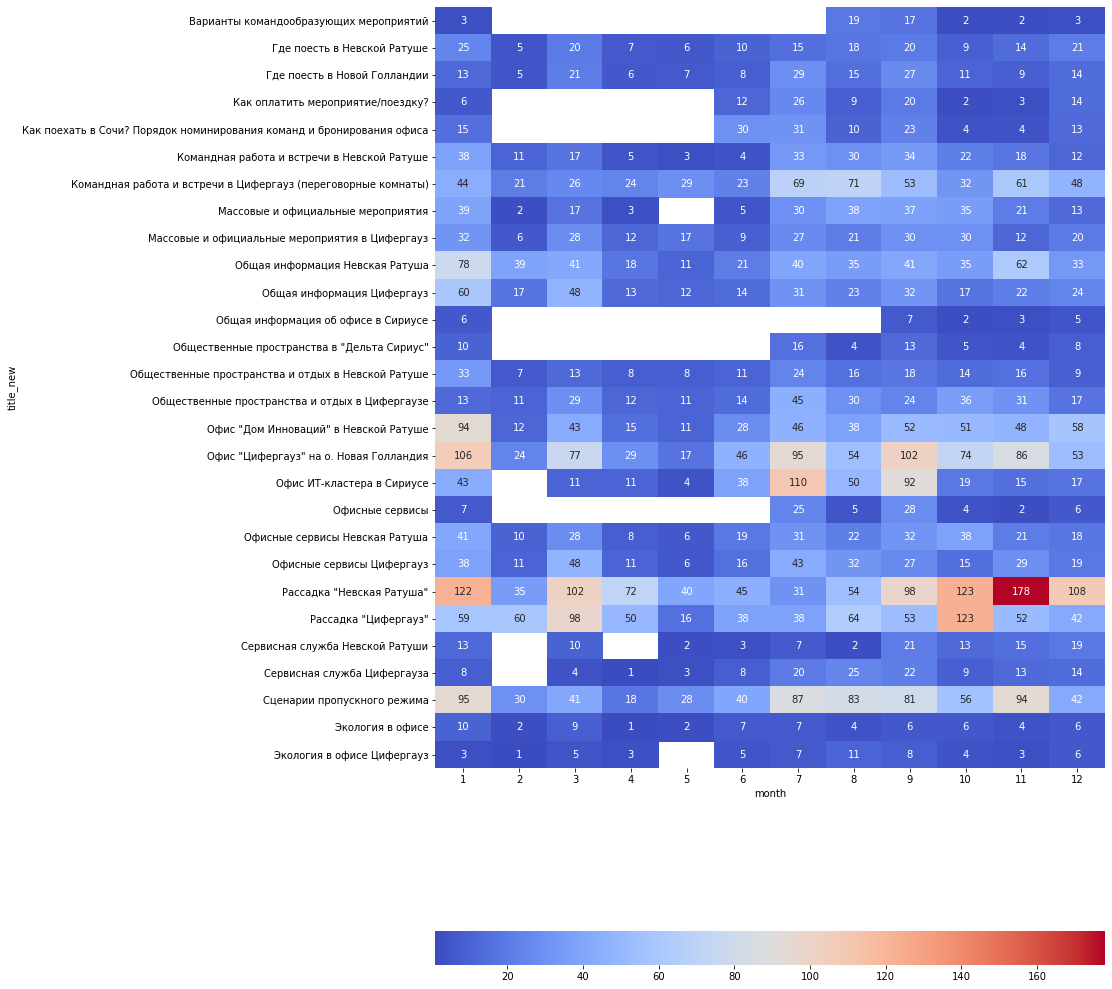

In [42]:
plt.figure(figsize = (12,20))
sns.heatmap(data_fav.pivot_table(index = 'title_new', columns = 'month', 
                             values = 'event_id', aggfunc = 'count'), cbar_kws= {'orientation': 'horizontal'}, 
                             cmap= 'coolwarm', annot = True, fmt='.4g')
plt.show()

In [43]:
data_2022_temp = data_2022
data_2022_temp = data_2022_temp.sort_values(by = ['uid', 'event_date'])
data_2022_temp['diff'] = data_2022_temp.groupby('uid')['event_date'].diff()
data_2022_temp.head()

,event_id,event_date,month,year,referrer_new,transition,title_new,uid,url_new,fav,first_visit,lifetime,diff
8639,12735485,2022-07-12,7,2022,Прямой,Прямой,"Рассадка ""Невская Ратуша""",000a518b-645b-4ba8-b87b-69bdb1968611,https://kb.gazprom-neft.local/pages/viewpage.a...,True,2022-07-12,0,NaT
20467,25628754,2022-12-22,12,2022,Прямой,Прямой,Digital office / Офис,000b74ae-24ce-4ce1-beae-cea5e430dc70,https://kb.gazprom-neft.local/display/DO,False,2022-12-22,0,NaT
15829,19215148,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,NaT
15830,19215216,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,0 days
15924,19290734,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,0 days


In [44]:
data_2022_temp.head(20)

,event_id,event_date,month,year,referrer_new,transition,title_new,uid,url_new,fav,first_visit,lifetime,diff
8639,12735485,2022-07-12,7,2022,Прямой,Прямой,"Рассадка ""Невская Ратуша""",000a518b-645b-4ba8-b87b-69bdb1968611,https://kb.gazprom-neft.local/pages/viewpage.a...,True,2022-07-12,0,NaT
20467,25628754,2022-12-22,12,2022,Прямой,Прямой,Digital office / Офис,000b74ae-24ce-4ce1-beae-cea5e430dc70,https://kb.gazprom-neft.local/display/DO,False,2022-12-22,0,NaT
15829,19215148,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,NaT
15830,19215216,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,0 days
15924,19290734,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,0 days
15927,19299414,2022-10-17,10,2022,Прямой,Прямой,Запись на спортивные занятия Цифергауз,0047ab09-f9ed-480c-a0c4-c61e6b21e396,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-17,0,0 days
15462,18800902,2022-10-11,10,2022,kb.gazprom-neft.local,Confluence,♀️ Участники рабочей группы,004890a1-3b4b-4f05-a952-6e1c66845dcc,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-11,0,NaT
15463,18800870,2022-10-11,10,2022,Прямой,Прямой,Digital office / Офис,004890a1-3b4b-4f05-a952-6e1c66845dcc,https://kb.gazprom-neft.local/display/DO,False,2022-10-11,0,0 days
15464,18800877,2022-10-11,10,2022,kb.gazprom-neft.local,Confluence,"Распределение рабочих мест для ДЦТ, ДИР, ДЦИ",004890a1-3b4b-4f05-a952-6e1c66845dcc,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-11,0,0 days
15465,18800893,2022-10-11,10,2022,kb.gazprom-neft.local,Confluence,Как закрепить РМ?,004890a1-3b4b-4f05-a952-6e1c66845dcc,https://kb.gazprom-neft.local/pages/viewpage.a...,False,2022-10-11,0,0 days
